## 1. Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## 2. Importing data

In [6]:
df= pd.read_csv('WC_AT.csv')
df.head(10)

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
5,71.85,21.68
6,80.90,29.08
7,83.40,32.98
8,63.50,11.44
9,73.20,32.22


## 3. Data Understanding

In [8]:
df.shape

(109, 2)

In [12]:
df.dtypes

Waist    float64
AT       float64
dtype: object

In [25]:
newspaper_data.isnull().sum()

daily     0
sunday    0
dtype: int64

In [14]:
df.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


## 4. Assumptions check

Text(0.5, 1.0, 'WC Vs AT Bell Curve')

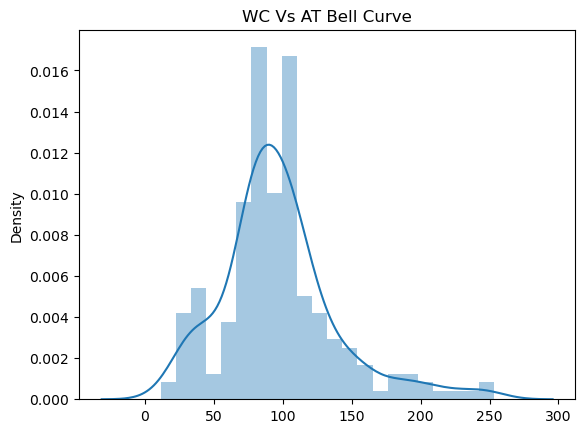

In [30]:
sns.distplot(df)
plt.title("WC Vs AT Bell Curve")

Text(0.5, 1.0, 'WC Vs AT Graph')

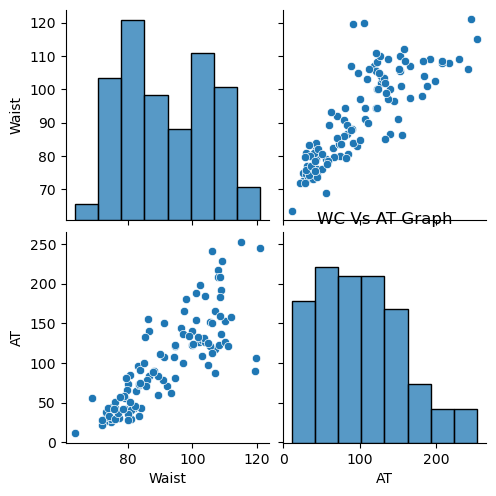

In [22]:
sns.pairplot(data=df)


<Axes: >

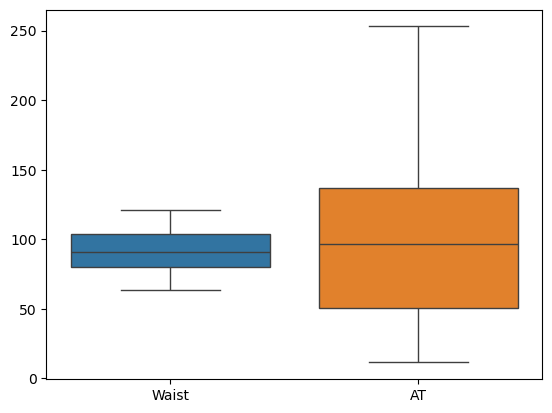

In [32]:
sns.boxplot(data=df)

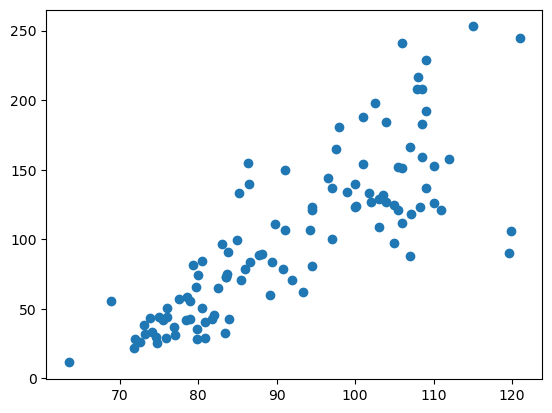

In [34]:
plt.scatter(x = 'Waist',y = 'AT', data = df)

In [36]:
df.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


## 5. Model Building and Model Training

Linear regression can be build using 2 libraries:

* statsmodels
* sklearn

In [ ]:
#!pip install statsmodels

In [42]:
import statsmodels.formula.api as sfa

In [44]:
#Building linear regression using ordinary least square technique
#linear_model = sfa.ols('Y~X',data).fit()
linear_model = sfa.ols('AT~Waist',data = df).fit() # .fit()-to find intercept and Slope

In [46]:
linear_model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

## 6. Model Testing

##### 6.1 Manual calculation

In [16]:
 1.339715*(200) + 13.835630

281.77862999999996

y = mx + c


  = 1.339715(400) + 13.835630

(1.339715 * 350) + 13.835630

#For 200 - 281
#For 400 - 549
#For 350 - 482

##### 6.2 Machine Prediction

In [48]:
train_data = df[['Waist']]
train_data

,Waist
0,74.75
1,72.60
2,81.80
3,83.95
4,74.65
...,...
104,100.10
105,93.30
106,101.80
107,107.90


In [50]:
linear_model.predict(train_data)

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [14]:
linear_model.predict(new_data)

0    281.778581
1    549.721533
2    482.735795
3    147.807106
dtype: float64

In [52]:
nw_data = pd.DataFrame({ 'Waist': [80,120,100,90]})
nw_data

,Waist
0,80
1,120
2,100
3,90


In [54]:
linear_model.predict(nw_data)

0     60.727263
1    199.081639
2    129.904451
3     95.315857
dtype: float64

<Axes: xlabel='Waist', ylabel='AT'>

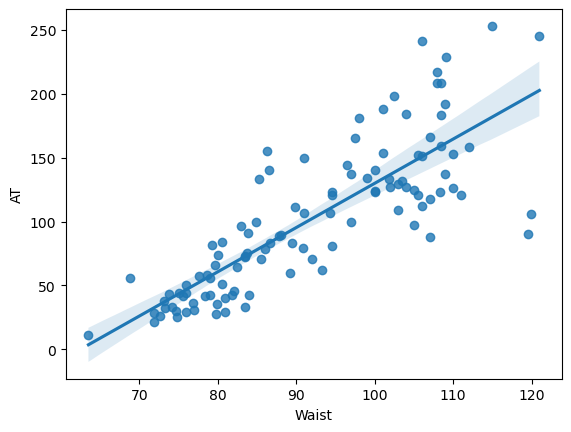

In [58]:
sns.regplot(x = 'Waist', y = 'AT', data = df)

In [37]:
sns.set_theme(style='darkgrid',palette='rainbow')

Text(0.5, 1.0, 'Waist & AT Regression plot')

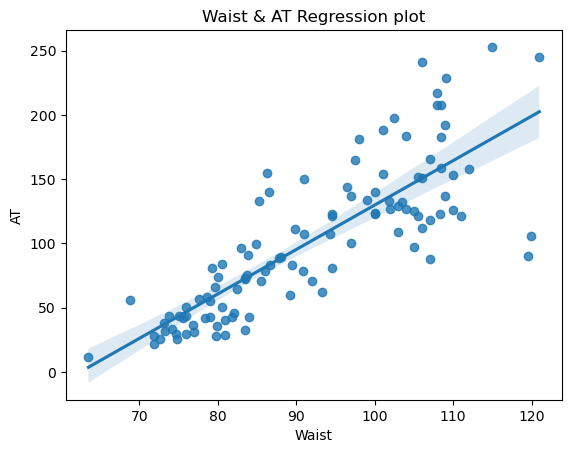

In [62]:
sns.regplot(x = 'Waist', y = 'AT', data = df)
plt.title("Waist & AT Regression plot")

## 7. Model Evaluation

In [60]:
linear_model.aic,linear_model.rsquared

(1073.977181831929, 0.670036893052843)

## 8. Model deployement

In [59]:
from pickle import dump

In [61]:
dump(linear_model,open('linear_model.pkl','wb')) #Serialzation

In [63]:
from pickle import load

In [65]:
loaded_model = load(open('linear_model.pkl','rb')) #Deserialzation

In [71]:
loaded_model.predict(new_data)

0    281.778581
1    549.721533
2    482.735795
3    147.807106
dtype: float64

In [79]:
loaded_model.predict(nw_data)

0    549.721533
1    415.750057
2    147.807106
3    482.735795
dtype: float64

In [81]:
############################The End####################################